### Impact of time averaging on spatial scales 


In [12]:
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
import numpy as np
from xgcm import Grid
import xrft

%matplotlib inline

In [3]:
ds_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored/'

In [4]:
ds = xr.open_zarr('/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored_zarr/')

In [5]:
ds

<xarray.Dataset>
Dimensions:              (YC: 400, XC: 400, time: 1980, Z: 40, Zp1: 41,
                          XG: 400, YG: 400, Zl: 40, Zu: 40,
                          layer_1TH_bounds: 43, layer_1TH_center: 42,
                          layer_1TH_interface: 41)
Coordinates: (12/32)
    Depth                (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    PHrefC               (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF               (Zp1) float32 dask.array<chunksize=(41,), meta=np.ndarray>
  * XC                   (XC) float32 2.5e+03 7.5e+03 ... 1.992e+06 1.998e+06
  * XG                   (XG) float32 0.0 5e+03 1e+04 ... 1.99e+06 1.995e+06
  * YC                   (YC) float32 2.5e+03 7.5e+03 ... 1.992e+06 1.998e+06
    ...                   ...
    maskW                (Z, YC, XG) bool dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
    rA                   (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    rAs                  (YG, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    rAw                  (YC, XG) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    rAz                  (YG, XG) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
  * time                 (time) timedelta64[ns] 61023 days ... 66960 days
Data variables: (12/27)
    Eta                  (time, YC, XC) float32 dask.array<chunksize=(35, 400, 400), meta=np.ndarray>
    PH                   (time, Z, YC, XC) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>
    PHL                  (time, YC, XC) float32 dask.array<chunksize=(35, 400, 400), meta=np.ndarray>
    PTRACER01            (time, Z, YC, XC) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>
    PTRACER02            (time, Z, YC, XC) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>
    PTRACER03            (time, Z, YC, XC) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>
    ...                   ...
    PTRACER19            (time, Z, YC, XC) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>
    PTRACER20            (time, Z, YC, XC) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>
    T                    (time, Z, YC, XC) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>
    U                    (time, Z, YC, XG) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>
    V                    (time, Z, YG, XC) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>
    W                    (time, Zl, YC, XC) float32 dask.array<chunksize=(35, 1, 400, 400), meta=np.ndarray>

### Impact of time filter on spatial scales

In [28]:
T_mean = ds['T'].mean('time')
C_mean = ds['PTRACER01'].mean('time')

In [29]:
T_mean.load();
C_mean.load();

<xarray.DataArray 'T' (Z: 40, YC: 400, XC: 400)>
dask.array<mean_agg-aggregate, shape=(40, 400, 400), dtype=float32, chunksize=(1, 400, 400), chunktype=numpy.ndarray>
Coordinates:
    Depth    (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    PHrefC   (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
  * XC       (XC) float32 2.5e+03 7.5e+03 1.25e+04 ... 1.992e+06 1.998e+06
  * YC       (YC) float32 2.5e+03 7.5e+03 1.25e+04 ... 1.992e+06 1.998e+06
  * Z        (Z) float32 -5.0 -15.0 -25.0 ... -2.728e+03 -2.83e+03 -2.934e+03
    drF      (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    hFacC    (Z, YC, XC) float32 dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>

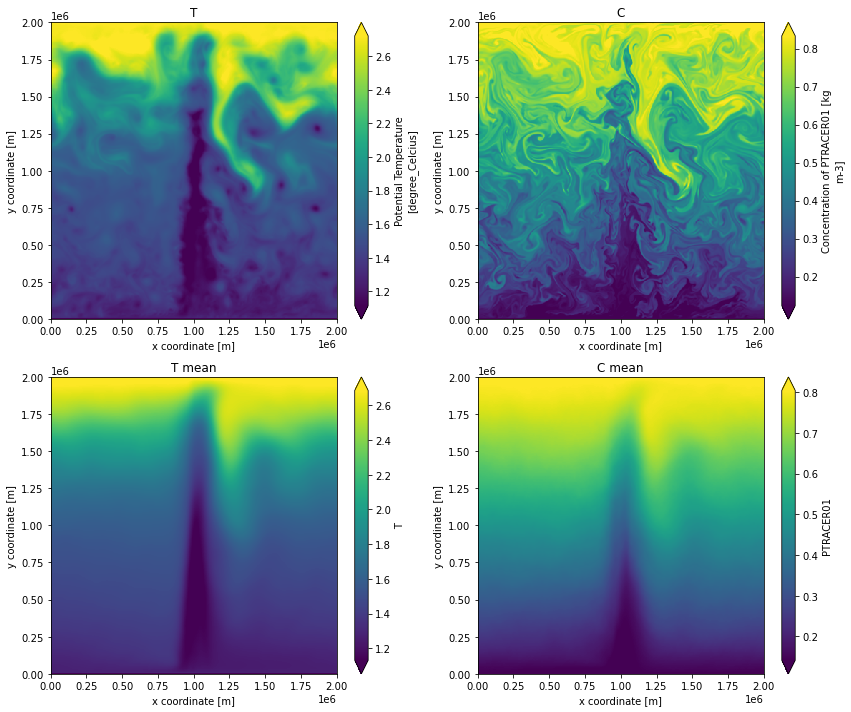

In [34]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
ds['T'].isel(time=0).sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('T')

plt.subplot(222)
ds['PTRACER01'].isel(time=0).sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('C')

plt.subplot(223)
T_mean.sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('T mean')

plt.subplot(224)
C_mean.sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('C mean')

plt.tight_layout()

In [35]:
T_ps_x = xrft.power_spectrum(ds['T'].drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('T_ps')
C_ps_x = xrft.power_spectrum(ds['PTRACER01'].drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('C_ps')

Tmean_ps_x = xrft.power_spectrum(T_mean.drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('T_ps')
Cmean_ps_x = xrft.power_spectrum(C_mean.drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('C_ps')

Text(0.5, 0, 'k [1/m]')

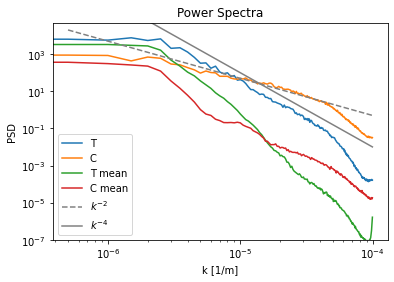

In [52]:
T_ps_x.isel(time=0).sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='T')
C_ps_x.isel(time=0).sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='C')

Tmean_ps_x.sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='T mean')
Cmean_ps_x.sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='C mean')


k= T_ps_x.freq_XC

plt.plot(k, 5e-9*k**-2, '--', color='gray', label=r'$k^{-2}$')
plt.plot(k, 1e-18*k**-4, '-', color='gray', label=r'$k^{-4}$')

plt.xscale('log')
plt.yscale('log')

plt.ylim([1e-7, 5e4])
plt.legend()

plt.title('Power Spectra')
plt.ylabel('PSD')
plt.xlabel('k [1/m]')

### Impact of time average on eddy fluxes 

How quickly do the eddy fluxes converge? 

First lets look at what happens to a time series. 

In [55]:
T_series = ds['T'].sel(XC=1000e3, YC=1000e3, Z=-1000, method='nearest')
T_series.load();

In [74]:
time = ((T_series.time - T_series.time[0])/1e9/3600/24).astype('float')

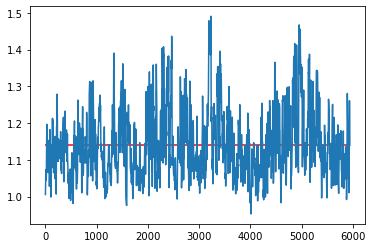

In [79]:
plt.plot(time, T_series)
plt.hlines(T_series.mean(), time[0], time[-1] , color='r')

In [90]:
dTemp = T_series.diff('time')
dT_dt = T_series.diff('time') / time.diff('time')

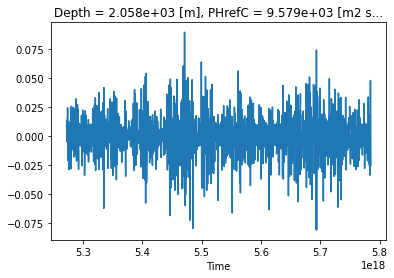

In [97]:
dT_dt.plot()

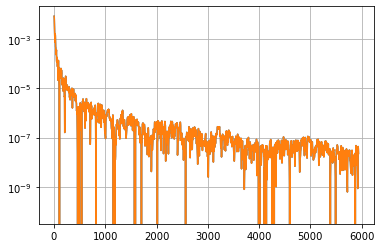

In [100]:
plt.plot(time , (T_series - T_series[0])/ time.cumsum() ) 
plt.plot(time [1:] , dT_dt.cumsum()*3. / time[1:].cumsum() ) 

plt.yscale('log')
#plt.yscale('log')

plt.grid()